In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn import preprocessing as pre
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix, accuracy_score, classification_report

In [29]:
Data = pd.read_csv(r'C:\Users\steph\Downloads\train_ctrUa4K.csv')

In [30]:
Data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [31]:
Data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [32]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [34]:
# segregating the categirical and numerical columns
col_cat = []
col_num = []
for i in Data.columns:
    if Data[i].dtype == 'object':
        col_cat.append(i)
    else:
        col_num.append(i)

print("Categorical columns are:",col_cat)
print("Numerical columns are:",col_num)
    

Categorical columns are: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
Numerical columns are: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [47]:
Data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

### Processing Null Values

In [48]:
Data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

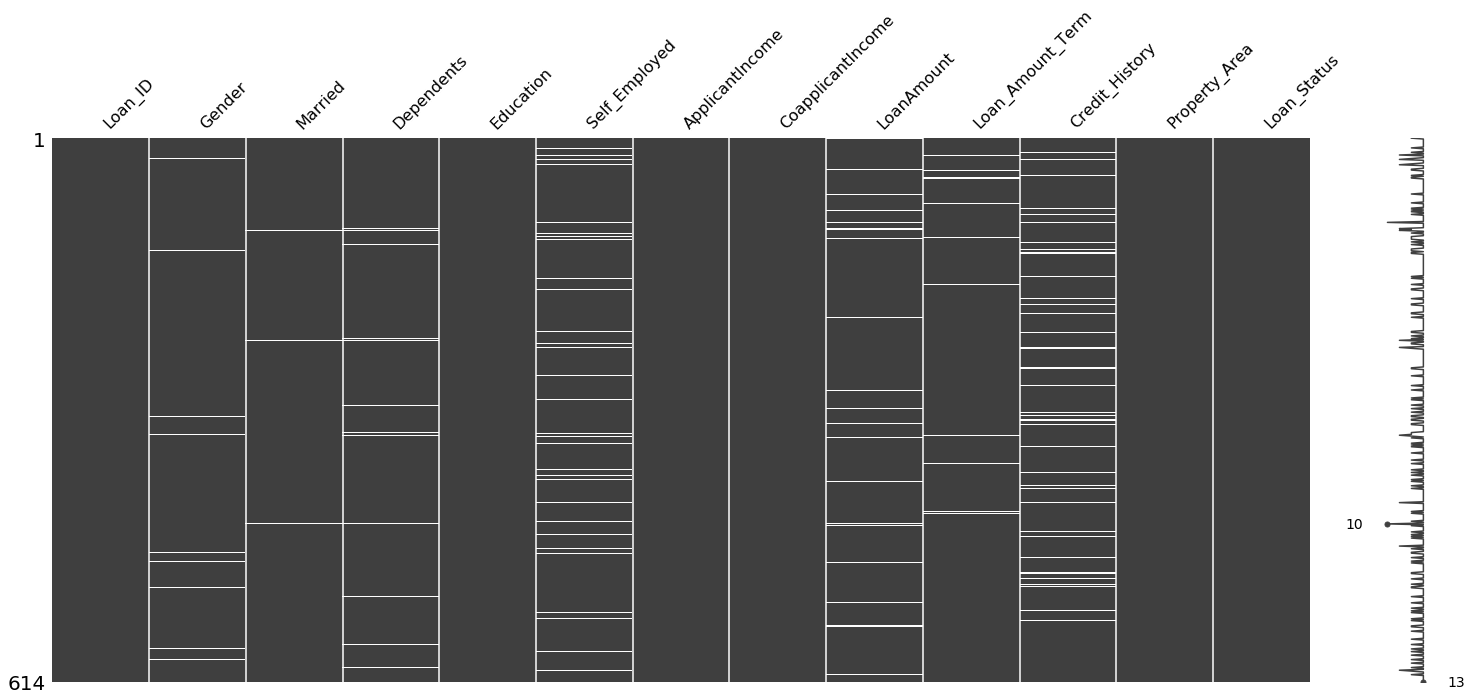

In [33]:
msno.matrix(Data)

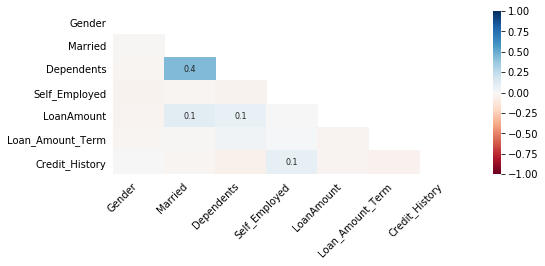

In [46]:
msno.heatmap(Data,figsize=(8,3),fontsize=10)

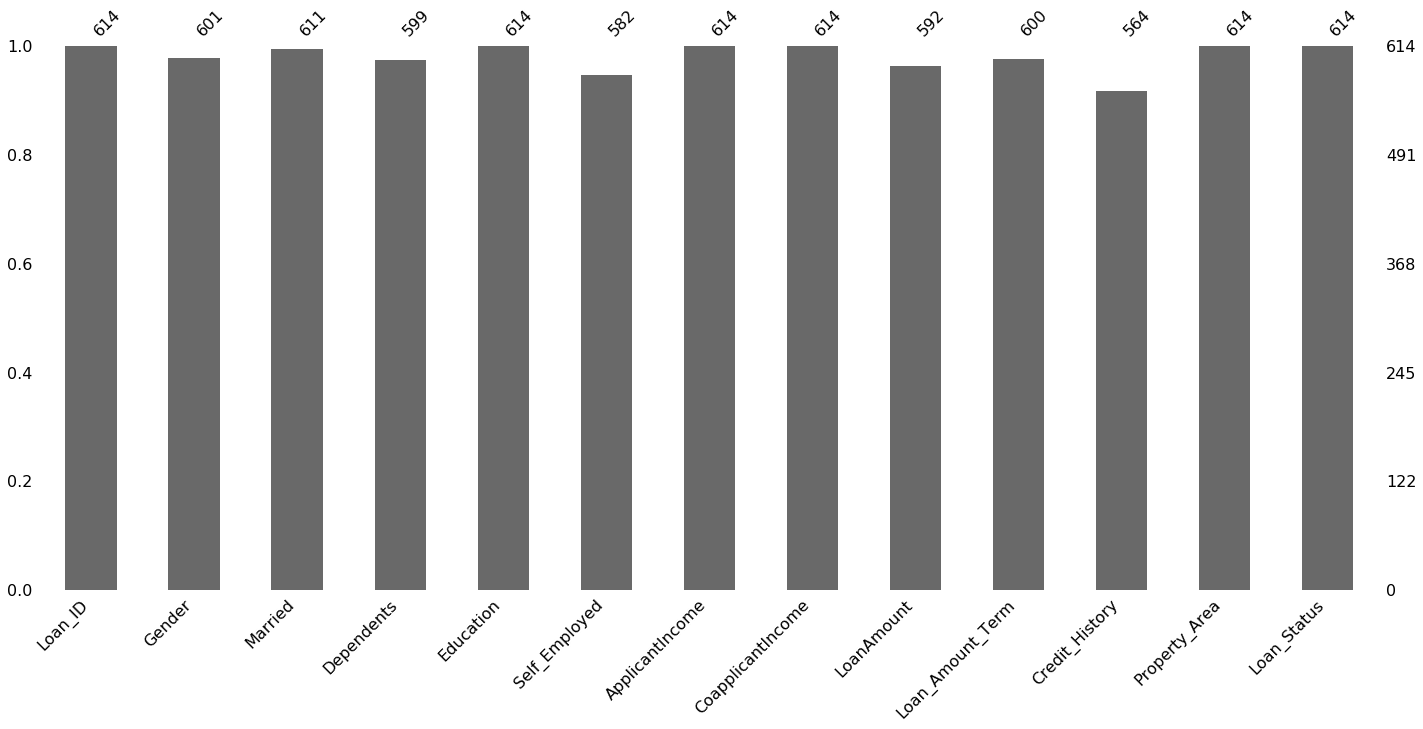

In [41]:
msno.bar(Data)

#### Creating Dataframe without nul values

In [49]:
Data_null_dropped = Data.dropna()
Data_null_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


In [51]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [50]:
Data_null_dropped.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


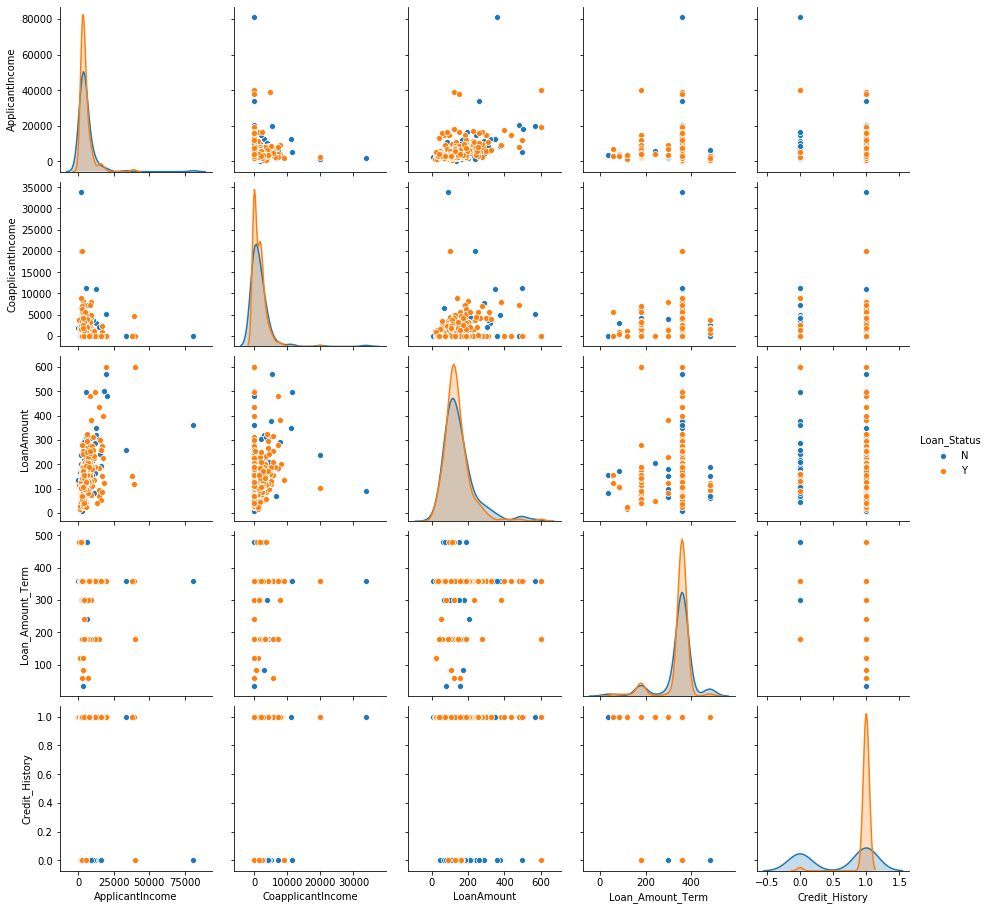

In [52]:
sns.pairplot(Data_null_dropped,hue = 'Loan_Status')

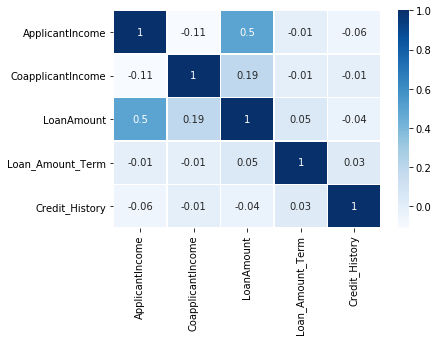

In [64]:
sns.heatmap(data=Data_null_dropped.corr().round(2),annot=True,linewidths=0.5,cmap='Blues')
plt.show()

In [97]:

    le = pre.LabelEncoder()
    cols = Data_null_dropped.columns.to_list()
    for columns in cols:
        if Data_null_dropped[columns].dtype == 'object':
            Data_null_dropped[columns] = le.fit_transform(Data_null_dropped[columns])
        

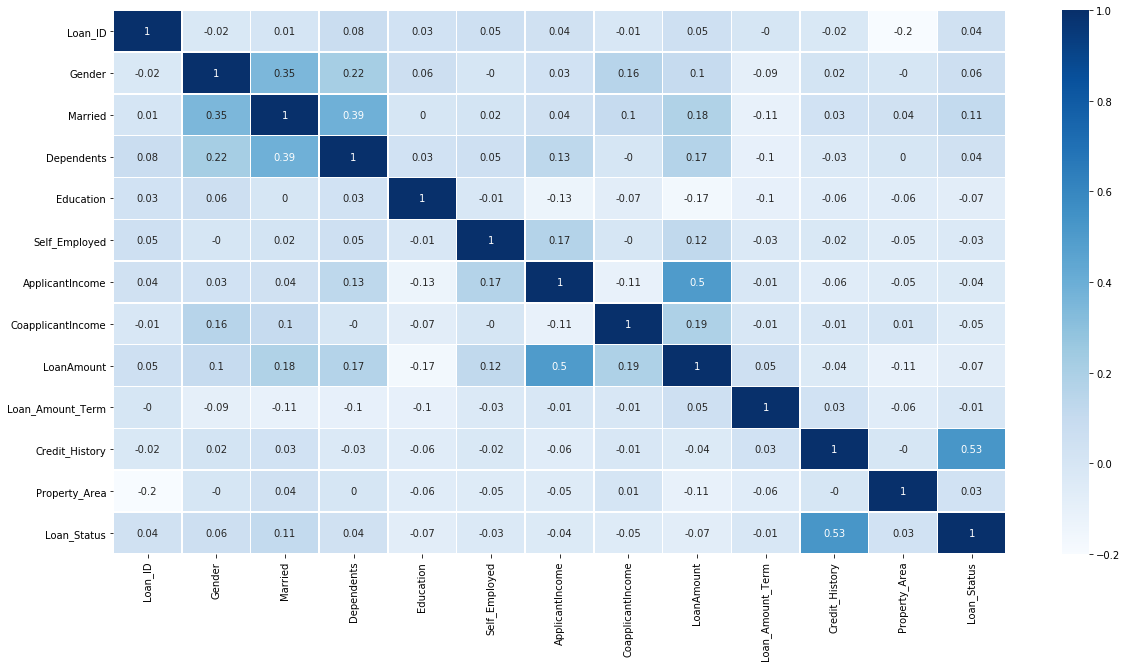

In [74]:
fig,ax = plt.subplots(figsize = (20,10))
sns.heatmap(data=Data_null_dropped.corr().round(2),annot=True,linewidths=0.5,cmap='Blues')
plt.show()

In [76]:
Data_null_dropped.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,4,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [79]:
X = Data_null_dropped.drop(["Loan_Status","Loan_ID"],axis=1)
Y = Data_null_dropped["Loan_Status"]

In [86]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.3,random_state=30)

In [92]:
model = LogisticRegression()
model.fit(Xtrain,Ytrain)

ypred = model.predict(Xtest)
print("Accuracy for this model is: %s%%" % (100*accuracy_score(ypred,Ytest)))
print(confusion_matrix(Ytest,ypred))
print("Classification report:")
print(classification_report(Ytest,ypred))


Accuracy for this model is: 76.38888888888889%
[[21 31]
 [ 3 89]]
Classification report:
              precision    recall  f1-score   support

           0       0.88      0.40      0.55        52
           1       0.74      0.97      0.84        92

    accuracy                           0.76       144
   macro avg       0.81      0.69      0.70       144
weighted avg       0.79      0.76      0.74       144



In [145]:
Data_test = pd.read_csv(r'C:\Users\steph\Downloads\test_lAUu6dG.csv')

In [146]:
Data_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [147]:
Data_test_columns = Data_test["Loan_ID"]
Data_test = Data_test.drop("Loan_ID",axis=1)

In [148]:
Data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             356 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         357 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      344 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         362 non-null    float64
 8   Loan_Amount_Term   361 non-null    float64
 9   Credit_History     338 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 31.7+ KB


In [150]:
Data_test.isna().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [151]:
le = pre.LabelEncoder()
cols = Data_test.columns.to_list()
for columns in cols:
    if Data_test[columns].dtype == 'object':
        Data_test[columns] = le.fit_transform(Data_test[columns])

In [152]:
Data_test["LoanAmount"] = Data_test["LoanAmount"].fillna(Data_test["LoanAmount"].mean())
Data_test["Loan_Amount_Term"] = Data_test["Loan_Amount_Term"].fillna(Data_test["Loan_Amount_Term"].mean())
Data_test["Credit_History"] = Data_test["Credit_History"].fillna(Data_test["Credit_History"].mean())

In [153]:
Result = pd.DataFrame(model.predict(Data_test))

In [154]:
Data_test_columns.head()

0    LP001015
1    LP001022
2    LP001031
3    LP001035
4    LP001051
Name: Loan_ID, dtype: object

In [174]:
Rresult_Final.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [159]:
Rresult_Final = pd.concat([Data_test_columns,Result],axis=1)

In [173]:
Rresult_Final.rename(columns={0:'Loan_Status'},inplace=True)

In [178]:
Rresult_Final["Loan_Status"].replace({1:"Y",0:"N"},inplace=True)

In [181]:
Rresult_Final.to_csv(r"C:\Users\steph\Documents\GitHub\MachineLearning\Loan Dataset_Model\1\solution.csv")